## Big Home Assignment 2

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, classification_report

In [4]:
heart_attack_data = pd.read_csv("datasets_bigHA/heart_attack.csv", sep=',')
heart_attack_data.shape, heart_attack_data, heart_attack_data.isnull().sum()

((303, 14),
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0     63    1   3     145   233    1        0       150     0      2.3    0   
 1     37    1   2     130   250    0        1       187     0      3.5    0   
 2     41    0   1     130   204    0        0       172     0      1.4    2   
 3     56    1   1     120   236    0        1       178     0      0.8    2   
 4     57    0   0     120   354    0        1       163     1      0.6    2   
 ..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
 298   57    0   0     140   241    0        1       123     1      0.2    1   
 299   45    1   3     110   264    0        1       132     0      1.2    1   
 300   68    1   0     144   193    1        1       141     0      3.4    1   
 301   57    1   0     130   131    0        1       115     1      1.2    1   
 302   57    0   1     130   236    0        0       174     0      0.0    1   
 
      caa  thall  output  

In [5]:
quality_of_wine_data = pd.read_csv("datasets_bigHA/quality_of_wine.csv", sep=',')
quality_of_wine_data.shape, quality_of_wine_data, quality_of_wine_data.isnull().sum()

((32485, 14),
        Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
 0            2732            7.4             0.170         0.29   
 1            2607            5.3             0.310         0.38   
 2            1653            4.7             0.145         0.29   
 3            3264            6.9             0.260         0.29   
 4            4931            6.4             0.450         0.07   
 ...           ...            ...               ...          ...   
 32480        2838            5.0             0.255         0.22   
 32481        6414            6.6             0.360         0.52   
 32482        1126            6.3             0.200         0.24   
 32483        2924            6.2             0.200         0.33   
 32484        5462            8.1             0.280         0.46   
 
        residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
 0                 1.4      0.047                 23.0                 107.0   
 1      

In [6]:
data_scientists_job_change_data = pd.read_csv("datasets_bigHA/Job_Change_of_Data_Scientists.csv", sep=',')
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 14),
        enrollee_id      city  city_development_index gender  \
 0             8949  city_103                   0.920   Male   
 1            29725   city_40                   0.776   Male   
 2            11561   city_21                   0.624    NaN   
 3            33241  city_115                   0.789    NaN   
 4              666  city_162                   0.767   Male   
 ...            ...       ...                     ...    ...   
 19153         7386  city_173                   0.878   Male   
 19154        31398  city_103                   0.920   Male   
 19155        24576  city_103                   0.920   Male   
 19156         5756   city_65                   0.802   Male   
 19157        23834   city_67                   0.855    NaN   
 
            relevent_experience enrolled_university education_level  \
 0      Has relevent experience       no_enrollment        Graduate   
 1       No relevent experience       no_enrollment        Graduate   
 2 

In [7]:
data_scientists_job_change_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Preprocessing

In [8]:
data_scientists_job_change_data.columns = ['enrollee_id', 'city_nom', 'city_development_index', 'gender_nom',
       'relevent_experience_nom', 'enrolled_university_nom', 'education_level_ord',
       'major_discipline_nom', 'experience_ord', 'company_size_ord', 'company_type_nom',
       'last_new_job_ord', 'training_hours', 'target']

In [9]:
del data_scientists_job_change_data["enrollee_id"]

In [10]:
def OrdMapping(df):
    
    
    education_level_ord_mapping = {'Primary School': 0,'High School': 1,'Graduate': 2 , 'Masters':3,'Phd': 4 }
    experience_ord_mapping= {'<1':0, '1':2, '2':3, '3':4,'4':5, '5':6, '6':7, '7':8, '8':9,'9':10, '10':11, '12':13, '13':14,'14':15, '15':16, '16':17,  '17':18,'18':19, '19':20,'20':21,'>20':22}
    company_size_ord_mapping = {'<10':0 ,'10/49':1,'50-99':2, '100-500':3, '500-999':4, '1000-4999':5,'5000-9999':6, '10000+':7}
    
    last_new_job_ord_mapping = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}
    df['education_level_ord'] = df.education_level_ord.map(education_level_ord_mapping)
    df['experience_ord'] = df.experience_ord.map(experience_ord_mapping)
    df['company_size_ord'] = df.company_size_ord.map(company_size_ord_mapping)
    df['last_new_job_ord'] = df.last_new_job_ord.map(last_new_job_ord_mapping)
     
    return df

In [11]:
data_scientists_job_change_data = OrdMapping(data_scientists_job_change_data)

In [12]:
ordinals = [c for c in data_scientists_job_change_data.columns if 'ord' in c]
nominals = [c for c in data_scientists_job_change_data.columns if 'nom' in c]

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

for c in nominals:
    le = LabelEncoder()
    le.fit(list(data_scientists_job_change_data[c].astype(str)))
    data_scientists_job_change_data[c] = le.transform(data_scientists_job_change_data[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   city_nom {'city_1': 0, 'city_10': 1, 'city_100': 2, 'city_101': 3, 'city_102': 4, 'city_103': 5, 'city_104': 6, 'city_105': 7, 'city_106': 8, 'city_107': 9, 'city_109': 10, 'city_11': 11, 'city_111': 12, 'city_114': 13, 'city_115': 14, 'city_116': 15, 'city_117': 16, 'city_118': 17, 'city_12': 18, 'city_120': 19, 'city_121': 20, 'city_123': 21, 'city_126': 22, 'city_127': 23, 'city_128': 24, 'city_129': 25, 'city_13': 26, 'city_131': 27, 'city_133': 28, 'city_134': 29, 'city_136': 30, 'city_138': 31, 'city_139': 32, 'city_14': 33, 'city_140': 34, 'city_141': 35, 'city_142': 36, 'city_143': 37, 'city_144': 38, 'city_145': 39, 'city_146': 40, 'city_149': 41, 'city_150': 42, 'city_152': 43, 'city_155': 44, 'city_157': 45, 'city_158': 46, 'city_159': 47, 'city_16': 48, 'city_160': 49, 'city_162': 50, 'city_165': 51, 'city_166': 52, 'city_167': 53, 'city_171': 54, 'city_173': 55, 'city_175': 56, 'city_176': 57, 'city_179': 58, 'city_18': 59, 'city_180': 60, 'city_19': 61,

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

cats = ordinals + nominals

imp = SimpleImputer(strategy = "most_frequent")
data_scientists_job_change_data[cats] = imp.fit_transform(data_scientists_job_change_data[cats])

In [15]:
data_scientists_job_change_data.isnull().sum()

city_nom                   0
city_development_index     0
gender_nom                 0
relevent_experience_nom    0
enrolled_university_nom    0
education_level_ord        0
major_discipline_nom       0
experience_ord             0
company_size_ord           0
company_type_nom           0
last_new_job_ord           0
training_hours             0
target                     0
dtype: int64

In [16]:
nums = [c for c in data_scientists_job_change_data.columns if c not in cats and c != "target"]

In [17]:
ss = StandardScaler()
data_scientists_job_change_data[nums] = ss.fit_transform(data_scientists_job_change_data[nums])

In [18]:
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 13),
        city_nom  city_development_index  gender_nom  relevent_experience_nom  \
 0           5.0                0.738919         1.0                      0.0   
 1          77.0               -0.428410         1.0                      1.0   
 2          64.0               -1.660590         3.0                      1.0   
 3          14.0               -0.323026         3.0                      1.0   
 4          50.0               -0.501368         1.0                      0.0   
 ...         ...                     ...         ...                      ...   
 19153      55.0                0.398448         1.0                      1.0   
 19154       5.0                0.738919         1.0                      0.0   
 19155       5.0                0.738919         1.0                      0.0   
 19156      94.0               -0.217642         1.0                      0.0   
 19157      95.0                0.212000         3.0                      1.0   
 
        enro

## Task part
Now we will perform classification on our selected data using standard ML tools.

In [19]:
from xgboost import XGBClassifier

def xGboost_flow(X_train, X_test, y_train, y_test, n_estimators=500, max_depth=5, 
                 learning_rate=0.5, colsample_bytree=0.70, n_jobs=4, objective='binary:logistic'):
    best_f1_score = 0.5
    best_learning_rate = learning_rate
    
    while learning_rate > 0.01:
        classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 5)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() < best_f1_score:
            best_f1_score = accuracies.mean()
            best_learning_rate = learning_rate
            
        learning_rate -= 0.05
    
    final_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=best_learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
    final_classifier.fit(X_train, y_train)
    
    importances = final_classifier.feature_importances_
    
    feature_names = X_train.columns
    feature_importances = sorted(zip(importances, feature_names), reverse=True)

    print("Feature importances:")
    for importance, name in feature_importances:
        print(f"{name}: {importance}")

    
    # Visualisation of feature importance
    plt.figure(figsize=(17, 10))
    sorted_idx = np.argsort(final_classifier.feature_importances_)[::-1]
    sns.barplot(x=final_classifier.feature_importances_[sorted_idx], y=X_train.columns[sorted_idx])
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.show()
    
    print(f"XgBoost test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"XgBoost test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

In [20]:
from sklearn.linear_model import LogisticRegression

def logreg_flow(X_train, X_test, y_train, y_test, C=100):
    best_f1_score = 0
    best_C = C
    
    while C < 1000:
        classifier = LogisticRegression(solver='liblinear', C=C)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 10)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() > best_f1_score:
            best_f1_score = accuracies.mean()
            best_C = C
            
        C += 100
        
    final_classifier = LogisticRegression(solver='liblinear', C=best_C)
    final_classifier.fit(X_train, y_train)
    
    print(f"LogisticRegression test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"LogisticRegression test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

def knn_flow(X_train, X_test, y_train, y_test, n_neighbors=3):
    best_f1_score = 0
    neighbors = n_neighbors
    best_neighbors_count = neighbors
    
    while neighbors < n_neighbors * 3:
        classifier = KNeighborsClassifier(n_neighbors=neighbors)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 10)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() > best_f1_score:
            best_f1_score = accuracies.mean()
            best_neighbors_count = neighbors
            
        neighbors += 1
        
    final_classifier = KNeighborsClassifier(n_neighbors=best_neighbors_count)
    final_classifier.fit(X_train, y_train)
    
    print(f"Knn test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"Knn test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

In [22]:
from catboost import CatBoostClassifier
from catboost import Pool
from catboost import cv

def catboost_flow(X_train, X_test, y_train, y_test, iterations=10, learning_rate=0.5):
    best_f1_score = 0
    best_learning_rate = learning_rate
    
    while learning_rate > 0.01:
        classifier = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate, task_type='GPU')
        
        train_pool = Pool(data=X_train, label=y_train, has_header=True)
        params = {
            'loss_function': 'Logloss',
            'iterations': iterations,
            'learning_rate': learning_rate,
            'eval_metric' : 'TotalF1',
        }
        cv_data = cv(
            params = params,
            pool = train_pool,
            fold_count=5,
            shuffle=True,
            partition_random_seed=0,
            plot=True,
            stratified=False,
            verbose=False
        )
        
        f1_mean = cv_data['train-TotalF1-mean'][1]
        print(f"f1-score mean value: {f1_mean}")
        print(f"f1-score STD value: {cv_data['train-TotalF1-std']}")
        print(f"========================================")
        
        if f1_mean > best_f1_score:
            best_f1_score = f1_mean
            best_learning_rate = learning_rate
            
        learning_rate -= 0.05
    
    final_classifier = CatBoostClassifier(iterations=iterations, learning_rate=best_learning_rate, task_type='CPU')
    final_classifier.fit(X_train, y_train)
    plt.figure(figsize=(17, 10))
    sns.barplot(x = X_train.columns, y = final_classifier.feature_importances_)
    
    print(f"Catboost test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"Catboost test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

## Split of the data and future model analysis

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer, LabelEncoder

## Heart attack analysis

In [24]:
le = LabelEncoder()

heart_attack_target = heart_attack_data['output']
heart_attack_data = heart_attack_data.drop(columns = ['output'], axis = 1)

for col in heart_attack_data.columns :
    le.fit(heart_attack_data[col])
    heart_attack_data[col] = le.transform(heart_attack_data[col])

heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test = train_test_split(heart_attack_data, heart_attack_target, test_size=.2)

Heart attacks research:
accuracy mean value: 0.780952380952381
accuracy STD value: 0.021162025976302994
accuracy mean value: 0.7727891156462585
accuracy STD value: 0.017619901221672667
accuracy mean value: 0.7893707482993197
accuracy STD value: 0.03932912758677142
accuracy mean value: 0.7728741496598639
accuracy STD value: 0.04598948888675714
accuracy mean value: 0.780952380952381
accuracy STD value: 0.028196694232550477
accuracy mean value: 0.7811224489795918
accuracy STD value: 0.01954561878903001
accuracy mean value: 0.7851190476190476
accuracy STD value: 0.028181560162533634
accuracy mean value: 0.7729591836734694
accuracy STD value: 0.041710895587133284
accuracy mean value: 0.7892857142857143
accuracy STD value: 0.014958737421921484
accuracy mean value: 0.7811224489795919
accuracy STD value: 0.03259521342711253
Feature importances:
cp: 0.2339746654033661
exng: 0.15411777794361115
caa: 0.13908624649047852
thall: 0.12030468136072159
sex: 0.06971175223588943
oldpeak: 0.04702165722846

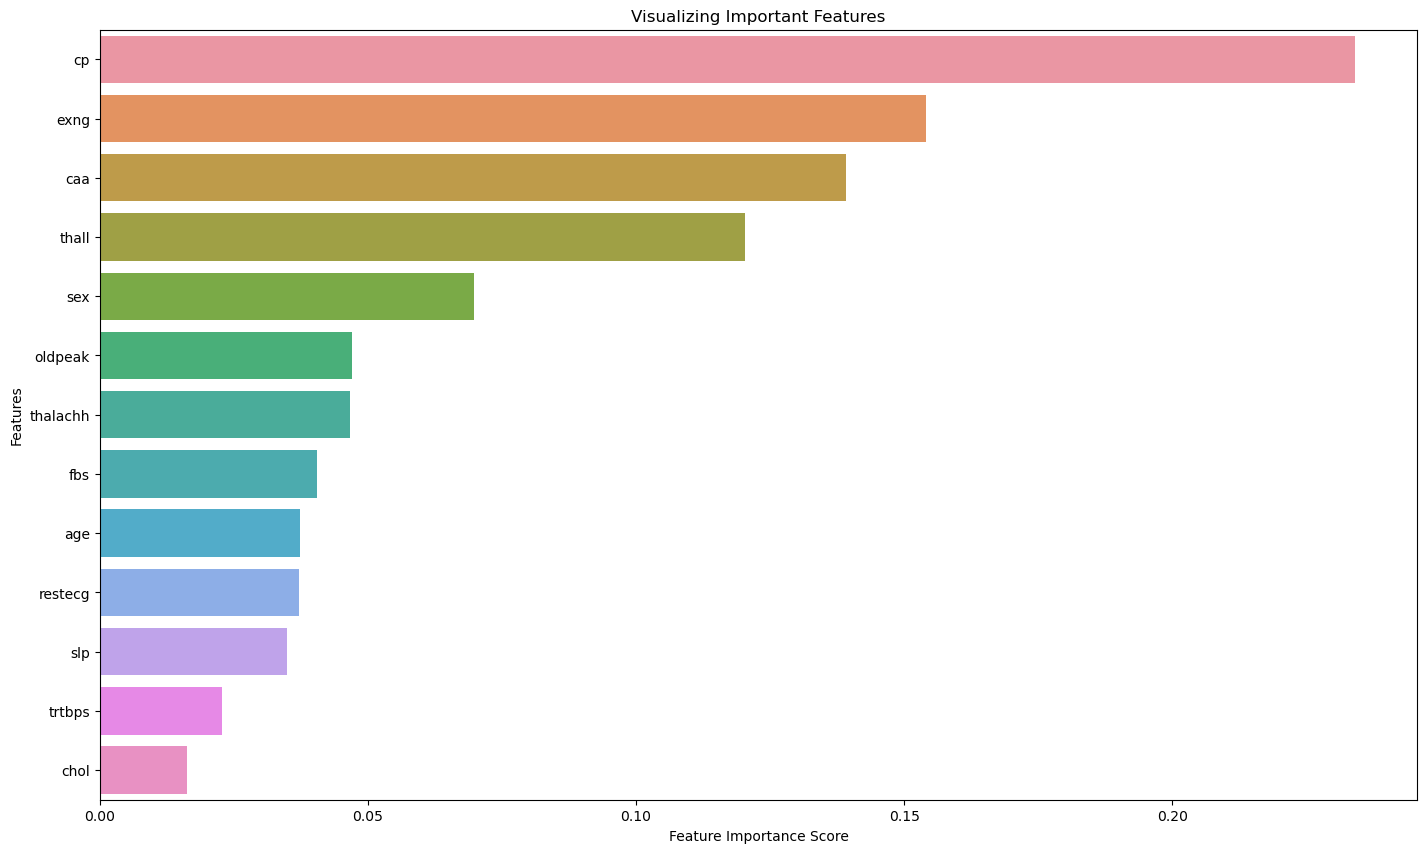

XgBoost test Accuracy: 0.9016393442622951
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.89      0.92        38

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [25]:
print("Heart attacks research:")
xGboost_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.877755102
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8765203051
bestIteration = 8

Training on fold [2/5]

bestTest = 0.8519031781
bestIteration = 9

Training on fold [3/5]

bestTest = 0.9379113646
bestIteration = 3

Training on fold [4/5]

bestTest = 0.6881856077
bestIteration = 0

f1-score mean value: 0.8789092290280861
f1-score STD value: 0    0.013536
1    0.011259
2    0.016674
3    0.026988
4    0.017385
5    0.014123
6    0.016991
7    0.013430
8    0.013652
9    0.006332
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8571428571
bestIteration = 4

Training on fold [1/5]

bestTest = 0.8564240791
bestIteration = 1

Training on fold [2/5]

bestTest = 0.8736772487
bestIteration = 5

Training on fold [3/5]

bestTest = 0.8965189411
bestIteration = 1

Training on fold [4/5]

bestTest = 0.7083333333
bestIteration = 8

f1-score mean value: 0.8820428156199795
f1-score STD value: 0    0.013536
1    0.007733
2    0.010501
3    0.019173
4    0.016768
5    0.016333
6    0.018126
7    0.019103
8    0.017268
9    0.013934
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.898214605
bestIteration = 2

Training on fold [1/5]

bestTest = 0.8570236605
bestIteration = 5

Training on fold [2/5]

bestTest = 0.8519031781
bestIteration = 3

Training on fold [3/5]

bestTest = 0.8965189411
bestIteration = 1

Training on fold [4/5]

bestTest = 0.6887254902
bestIteration = 4

f1-score mean value: 0.885092381724293
f1-score STD value: 0    0.013536
1    0.009959
2    0.012112
3    0.011905
4    0.011999
5    0.012527
6    0.017398
7    0.012875
8    0.010066
9    0.007291
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.898214605
bestIteration = 2

Training on fold [1/5]

bestTest = 0.8772438741
bestIteration = 4

Training on fold [2/5]

bestTest = 0.8519031781
bestIteration = 9

Training on fold [3/5]

bestTest = 0.9171075838
bestIteration = 1

Training on fold [4/5]

bestTest = 0.6887254902
bestIteration = 4

f1-score mean value: 0.8810251749921578
f1-score STD value: 0    0.013536
1    0.005157
2    0.013502
3    0.013074
4    0.014408
5    0.013600
6    0.010711
7    0.014287
8    0.009214
9    0.007601
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.898214605
bestIteration = 2

Training on fold [1/5]

bestTest = 0.8570236605
bestIteration = 5

Training on fold [2/5]

bestTest = 0.8500337382
bestIteration = 2

Training on fold [3/5]

bestTest = 0.8965189411
bestIteration = 1

Training on fold [4/5]

bestTest = 0.72976086
bestIteration = 1

f1-score mean value: 0.8902594383989243
f1-score STD value: 0    0.013536
1    0.012968
2    0.023864
3    0.020579
4    0.019633
5    0.019251
6    0.017766
7    0.010023
8    0.004676
9    0.004357
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.898214605
bestIteration = 7

Training on fold [1/5]

bestTest = 0.8570236605
bestIteration = 5

Training on fold [2/5]

bestTest = 0.8736772487
bestIteration = 7

Training on fold [3/5]

bestTest = 0.8758741259
bestIteration = 0

Training on fold [4/5]

bestTest = 0.72976086
bestIteration = 1

f1-score mean value: 0.8892554608314095
f1-score STD value: 0    0.013536
1    0.013059
2    0.017057
3    0.026466
4    0.023166
5    0.018443
6    0.019218
7    0.015756
8    0.015377
9    0.011743
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8979591837
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8564240791
bestIteration = 1

Training on fold [2/5]

bestTest = 0.8736772487
bestIteration = 6

Training on fold [3/5]

bestTest = 0.8961566888
bestIteration = 9

Training on fold [4/5]

bestTest = 0.72976086
bestIteration = 1

f1-score mean value: 0.8861767712605658
f1-score STD value: 0    0.013536
1    0.012115
2    0.019959
3    0.032920
4    0.025305
5    0.026322
6    0.025208
7    0.018969
8    0.016977
9    0.018323
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8979591837
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8978740432
bestIteration = 1

Training on fold [2/5]

bestTest = 0.8942165558
bestIteration = 4

Training on fold [3/5]

bestTest = 0.8965189411
bestIteration = 5

Training on fold [4/5]

bestTest = 0.72976086
bestIteration = 1

f1-score mean value: 0.8851112460846512
f1-score STD value: 0    0.013536
1    0.016239
2    0.020457
3    0.025646
4    0.030280
5    0.023093
6    0.019883
7    0.014769
8    0.013461
9    0.012411
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.898214605
bestIteration = 3

Training on fold [1/5]

bestTest = 0.9183673469
bestIteration = 1

Training on fold [2/5]

bestTest = 0.8723214286
bestIteration = 5

Training on fold [3/5]

bestTest = 0.8965189411
bestIteration = 2

Training on fold [4/5]

bestTest = 0.72976086
bestIteration = 1

f1-score mean value: 0.8840904981833576
f1-score STD value: 0    0.013536
1    0.017085
2    0.011498
3    0.017771
4    0.013287
5    0.018581
6    0.013937
7    0.022721
8    0.013061
9    0.017183
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8563084808
bestIteration = 8

Training on fold [1/5]

bestTest = 0.9183673469
bestIteration = 1

Training on fold [2/5]

bestTest = 0.8723214286
bestIteration = 6

Training on fold [3/5]

bestTest = 0.9376940133
bestIteration = 4

Training on fold [4/5]

bestTest = 0.72976086
bestIteration = 1

f1-score mean value: 0.8810201860986367
f1-score STD value: 0    0.013536
1    0.018360
2    0.009199
3    0.010143
4    0.015239
5    0.013095
6    0.011548
7    0.012423
8    0.013454
9    0.014037
Name: train-TotalF1-std, dtype: float64
0:	learn: 0.6040302	total: 1.63ms	remaining: 14.7ms
1:	learn: 0.5520766	total: 2.68ms	remaining: 10.7ms
2:	learn: 0.5058775	total: 3.87ms	remaining: 9.03ms
3:	learn: 0.4754638	total: 5.79ms	remaining: 8.69ms
4:	learn: 0.4465759	total: 7.39ms	remaining: 7.39ms
5:	learn: 0.4255890	total: 8.58ms	remaining: 5.72ms
6:	learn: 0.4079204	total: 9.82ms	remaining: 4.21ms
7:	learn: 0.3903144	total: 11ms	remaining: 2.76ms
8:	learn: 0.3

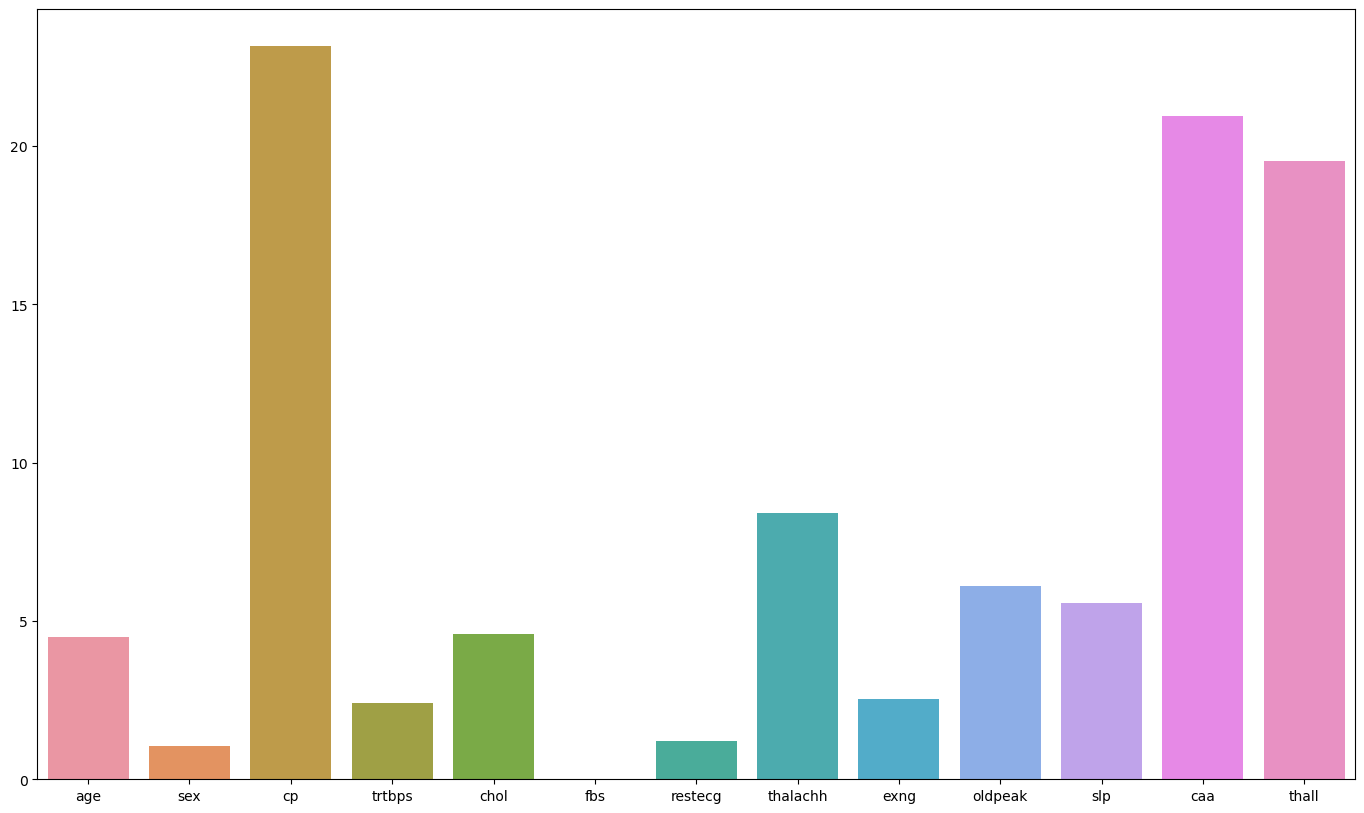

In [26]:
catboost_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

In [27]:
logreg_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
accuracy mean value: 0.8265
accuracy STD value: 0.08270244521442183
LogisticRegression test Accuracy: 0.8688524590163934
LogisticRegression test F1 Score
:               precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.94      0.84      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88     

In [28]:
knn_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

accuracy mean value: 0.682
accuracy STD value: 0.05457818041834829
accuracy mean value: 0.6490000000000001
accuracy STD value: 0.08422258868287323
accuracy mean value: 0.6651666666666667
accuracy STD value: 0.05748647183855038
accuracy mean value: 0.6736666666666666
accuracy STD value: 0.06961720732373253
accuracy mean value: 0.6945
accuracy STD value: 0.08613635830601513
accuracy mean value: 0.6904999999999999
accuracy STD value: 0.07673927720969663
Knn test Accuracy: 0.6885245901639344
Knn test F1 Score
:               precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.77      0.71      0.74        38

    accuracy                           0.69        61
   macro avg       0.67      0.68      0.68        61
weighted avg       0.70      0.69      0.69        61



## Wine quality analisys

In [29]:
binarizer = Binarizer(threshold=5)
le = LabelEncoder()

quality_of_wine_target = binarizer.transform(quality_of_wine_data['quality'].values.reshape(-1,1))
quality_of_wine_data['Type'] = le.fit_transform(quality_of_wine_data['Type'])

quality_of_wine_data = quality_of_wine_data.drop(columns = ['quality'], axis = 1)

quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test = train_test_split(quality_of_wine_data, quality_of_wine_target, test_size=.2)

accuracy mean value: 0.9930736892558623
accuracy STD value: 0.0007982784526329327
accuracy mean value: 0.9930736892558624
accuracy STD value: 0.0008165503646212877
accuracy mean value: 0.9926888740603671
accuracy STD value: 0.000935147958469745
accuracy mean value: 0.9924964923751036
accuracy STD value: 0.0007203291678505922
accuracy mean value: 0.9925734302420752
accuracy STD value: 0.0011392915271826634
accuracy mean value: 0.9926888370425327
accuracy STD value: 0.001122503558657584
accuracy mean value: 0.9900722018052412
accuracy STD value: 0.0017916524848933006
accuracy mean value: 0.98383861319939
accuracy STD value: 0.001271406939461456
accuracy mean value: 0.9651376400819635
accuracy STD value: 0.00360991033901915
accuracy mean value: 0.9165383023902489
accuracy STD value: 0.0021198741835350746
Feature importances:
alcohol: 0.16991645097732544
Type: 0.16956594586372375
volatile acidity: 0.09164479374885559
density: 0.0669391080737114
sulphates: 0.06570805609226227
free sulfur di

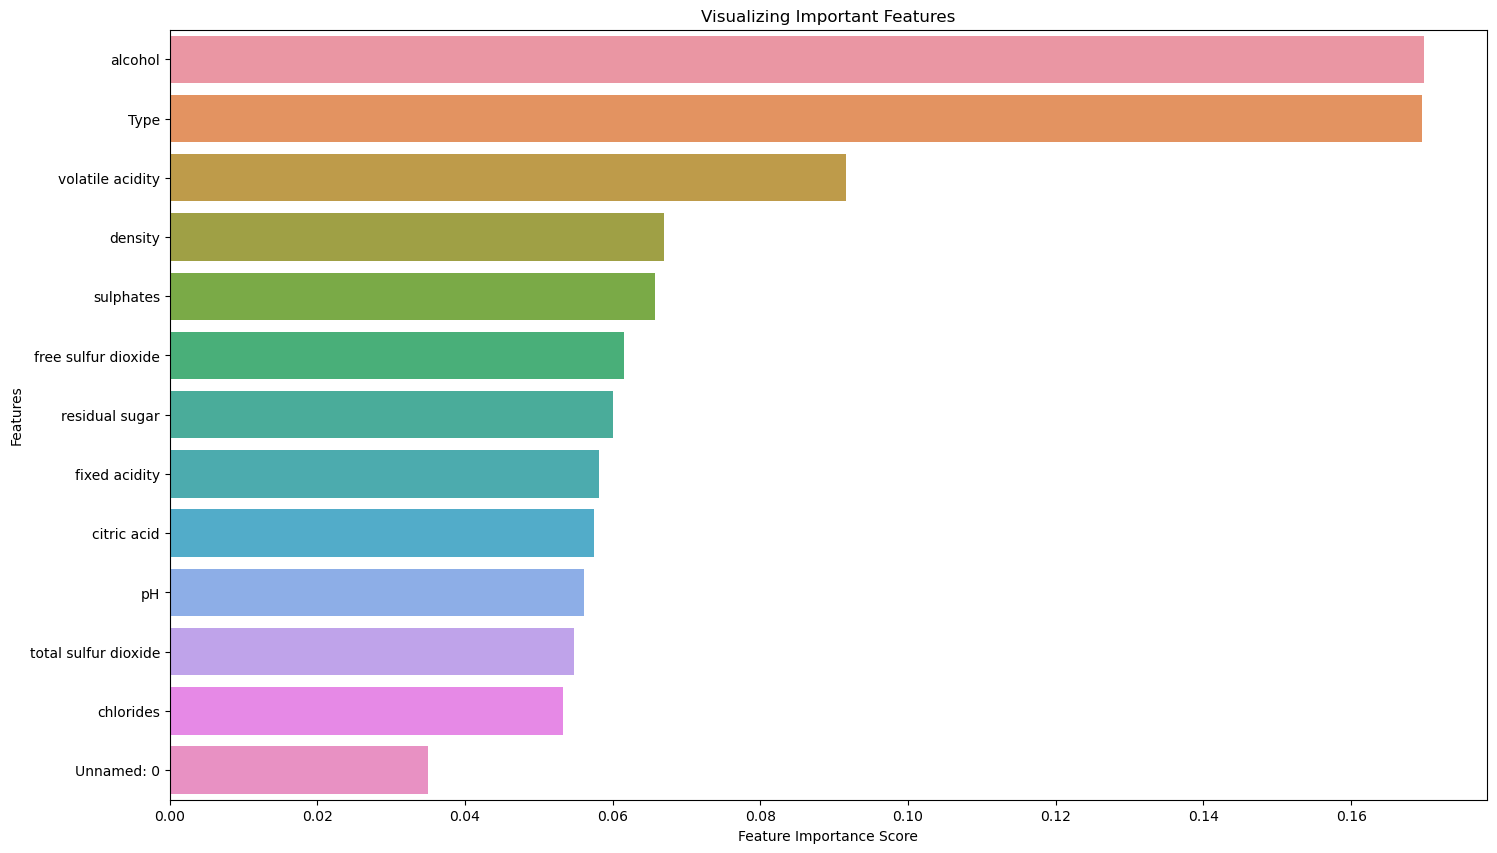

XgBoost test Accuracy: 0.9963059873787902
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2396
           1       1.00      1.00      1.00      4101

    accuracy                           1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



In [30]:
xGboost_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

In [31]:
logreg_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

accuracy mean value: 0.7324910599534789
accuracy STD value: 0.010884413545709803
accuracy mean value: 0.7310298773644509
accuracy STD value: 0.013163089913970133
accuracy mean value: 0.7252193136402021
accuracy STD value: 0.007594129208554761
accuracy mean value: 0.7330297731021673
accuracy STD value: 0.011133232934824228
accuracy mean value: 0.7308374364392535
accuracy STD value: 0.010643281485782547
accuracy mean value: 0.7306441365350149
accuracy STD value: 0.010637563645212381
accuracy mean value: 0.7242183957174267
accuracy STD value: 0.013867752366801486
accuracy mean value: 0.7309905864783073
accuracy STD value: 0.01185001811923737
accuracy mean value: 0.7317605427088821
accuracy STD value: 0.01470060693729231
LogisticRegression test Accuracy: 0.7432661228259196
LogisticRegression test F1 Score
:               precision    recall  f1-score   support

           0       0.70      0.54      0.61      2396
           1       0.76      0.86      0.81      4101

    accuracy         

In [32]:
knn_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

accuracy mean value: 0.9485919408216757
accuracy STD value: 0.005417633186169134
accuracy mean value: 0.9141913260296419
accuracy STD value: 0.004493962108835634
accuracy mean value: 0.8874862600378364
accuracy STD value: 0.007299030081310612
accuracy mean value: 0.8486221383779691
accuracy STD value: 0.008137308095002056
accuracy mean value: 0.8205327832313074
accuracy STD value: 0.008742670712856185
accuracy mean value: 0.7930590790974559
accuracy STD value: 0.0106057066362668
Knn test Accuracy: 0.9627520394028013
Knn test F1 Score
:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2396
           1       0.97      0.97      0.97      4101

    accuracy                           0.96      6497
   macro avg       0.96      0.96      0.96      6497
weighted avg       0.96      0.96      0.96      6497



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7936203036
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7834479673
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7960603565
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7879721296
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7986626252
bestIteration = 9

f1-score mean value: 0.752419954522477
f1-score STD value: 0    0.001267
1    0.004204
2    0.005075
3    0.004186
4    0.004554
5    0.003063
6    0.003259
7    0.003547
8    0.002101
9    0.002417
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7908929576
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7898716576
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7986173759
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7849654889
bestIteration = 8

Training on fold [4/5]

bestTest = 0.7877163311
bestIteration = 9

f1-score mean value: 0.7498632598684842
f1-score STD value: 0    0.001267
1    0.004738
2    0.004555
3    0.004305
4    0.004346
5    0.002808
6    0.004500
7    0.003751
8    0.002769
9    0.003496
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7870092444
bestIteration = 9

Training on fold [1/5]

bestTest = 0.785625369
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7933372131
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7843109256
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7917130286
bestIteration = 9

f1-score mean value: 0.7515941490602426
f1-score STD value: 0    0.001267
1    0.004868
2    0.003467
3    0.002007
4    0.003409
5    0.003432
6    0.005112
7    0.002371
8    0.001511
9    0.002263
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7849277281
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7848436931
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7862762014
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7847627272
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7934748313
bestIteration = 9

f1-score mean value: 0.749109386269488
f1-score STD value: 0    0.001267
1    0.003894
2    0.002919
3    0.005291
4    0.005902
5    0.004971
6    0.003675
7    0.004204
8    0.002759
9    0.002417
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7796873518
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7873663242
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7813211885
bestIteration = 8

Training on fold [3/5]

bestTest = 0.775862705
bestIteration = 8

Training on fold [4/5]

bestTest = 0.787899004
bestIteration = 9

f1-score mean value: 0.7483807779871372
f1-score STD value: 0    0.001267
1    0.004049
2    0.004016
3    0.004414
4    0.004012
5    0.004202
6    0.005412
7    0.003039
8    0.001818
9    0.003715
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.766084497
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7689574788
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7731985142
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7778868861
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7830356875
bestIteration = 9

f1-score mean value: 0.7480529411256794
f1-score STD value: 0    0.001267
1    0.004653
2    0.002296
3    0.002926
4    0.001009
5    0.004031
6    0.002116
7    0.004322
8    0.004261
9    0.004222
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7601101155
bestIteration = 9

Training on fold [1/5]

bestTest = 0.770095969
bestIteration = 9

Training on fold [2/5]

bestTest = 0.767350457
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7678986952
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7727395733
bestIteration = 8

f1-score mean value: 0.7455746143272557
f1-score STD value: 0    0.001267
1    0.001080
2    0.003827
3    0.003076
4    0.004104
5    0.003679
6    0.001505
7    0.003677
8    0.002444
9    0.004021
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7534141379
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7540574178
bestIteration = 8

Training on fold [2/5]

bestTest = 0.7666019729
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7551005817
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7643341726
bestIteration = 9

f1-score mean value: 0.7456385122529008
f1-score STD value: 0    0.001267
1    0.002136
2    0.003295
3    0.004133
4    0.002473
5    0.003127
6    0.003710
7    0.003562
8    0.002235
9    0.001770
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7488424966
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7461399329
bestIteration = 7

Training on fold [2/5]

bestTest = 0.7517318829
bestIteration = 9

Training on fold [3/5]

bestTest = 0.748357419
bestIteration = 9

Training on fold [4/5]

bestTest = 0.760846308
bestIteration = 9

f1-score mean value: 0.7443996260669773
f1-score STD value: 0    0.001267
1    0.003068
2    0.003643
3    0.004071
4    0.002643
5    0.002904
6    0.002867
7    0.003227
8    0.002807
9    0.003549
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7414799028
bestIteration = 7

Training on fold [1/5]

bestTest = 0.7416943681
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7473711554
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7488077967
bestIteration = 7

Training on fold [4/5]

bestTest = 0.7529331904
bestIteration = 9

f1-score mean value: 0.7413493769583891
f1-score STD value: 0    0.001267
1    0.005883
2    0.003139
3    0.003469
4    0.003088
5    0.002921
6    0.003171
7    0.003086
8    0.002520
9    0.002626
Name: train-TotalF1-std, dtype: float64
0:	learn: 0.5847450	total: 6.6ms	remaining: 59.4ms
1:	learn: 0.5376955	total: 15.4ms	remaining: 61.8ms
2:	learn: 0.5126200	total: 21.8ms	remaining: 50.8ms
3:	learn: 0.4950592	total: 31.1ms	remaining: 46.6ms
4:	learn: 0.4824631	total: 36.8ms	remaining: 36.8ms
5:	learn: 0.4763306	total: 45.4ms	remaining: 30.2ms
6:	learn: 0.4668599	total: 51.4ms	remaining: 22ms
7:	learn: 0.4596257	total: 58.5ms	remaining: 14.6ms
8:	learn: 0.

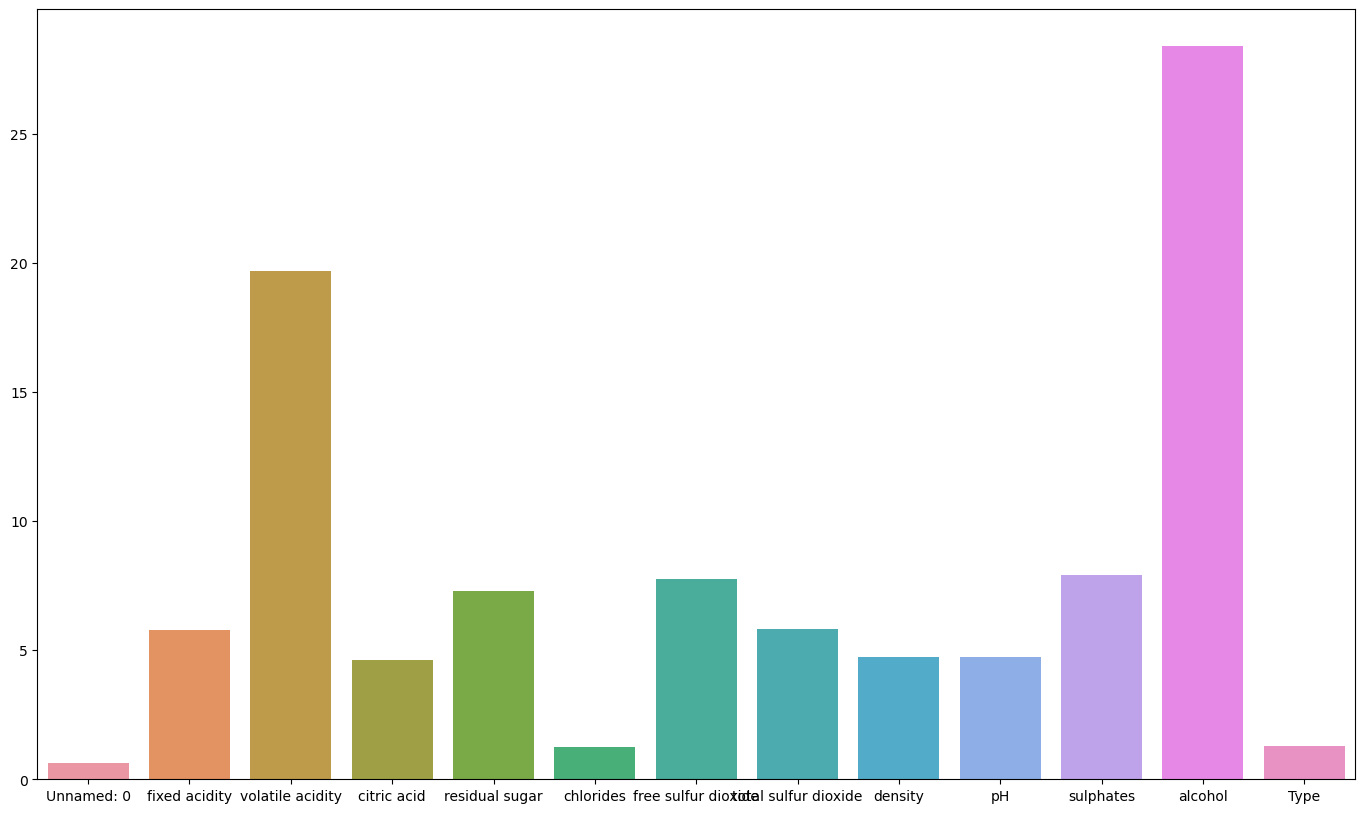

In [33]:
catboost_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

## Data scientists job change analysis

In [34]:
le = LabelEncoder()

data_scientists_job_change_target = data_scientists_job_change_data['target']
data_scientists_job_change_data = data_scientists_job_change_data.drop(columns = ['target'], axis = 1)

for col in data_scientists_job_change_data.columns:
    le.fit(data_scientists_job_change_data[col])
    data_scientists_job_change_data[col] = le.transform(data_scientists_job_change_data[col])

data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test = train_test_split(data_scientists_job_change_data, data_scientists_job_change_target, test_size=.2)

accuracy mean value: 0.7640606813240838
accuracy STD value: 0.007543992241517595
accuracy mean value: 0.7663445525252494
accuracy STD value: 0.004575941933343281
accuracy mean value: 0.7681060816469429
accuracy STD value: 0.006511121854228507
accuracy mean value: 0.7714342752006165
accuracy STD value: 0.004200468562213397
accuracy mean value: 0.7726085711944614
accuracy STD value: 0.004815906283555995
accuracy mean value: 0.7773711995692375
accuracy STD value: 0.007503998328000748
accuracy mean value: 0.7803734693725531
accuracy STD value: 0.004202525158379521
accuracy mean value: 0.7836355800448852
accuracy STD value: 0.004328912851609073
accuracy mean value: 0.7855932508201834
accuracy STD value: 0.007015656346747947
accuracy mean value: 0.7908782212744313
accuracy STD value: 0.00369256311715653
Feature importances:
city_development_index: 0.17087186872959137
company_type_nom: 0.16540825366973877
major_discipline_nom: 0.09867668896913528
experience_ord: 0.07150046527385712
relevent_e

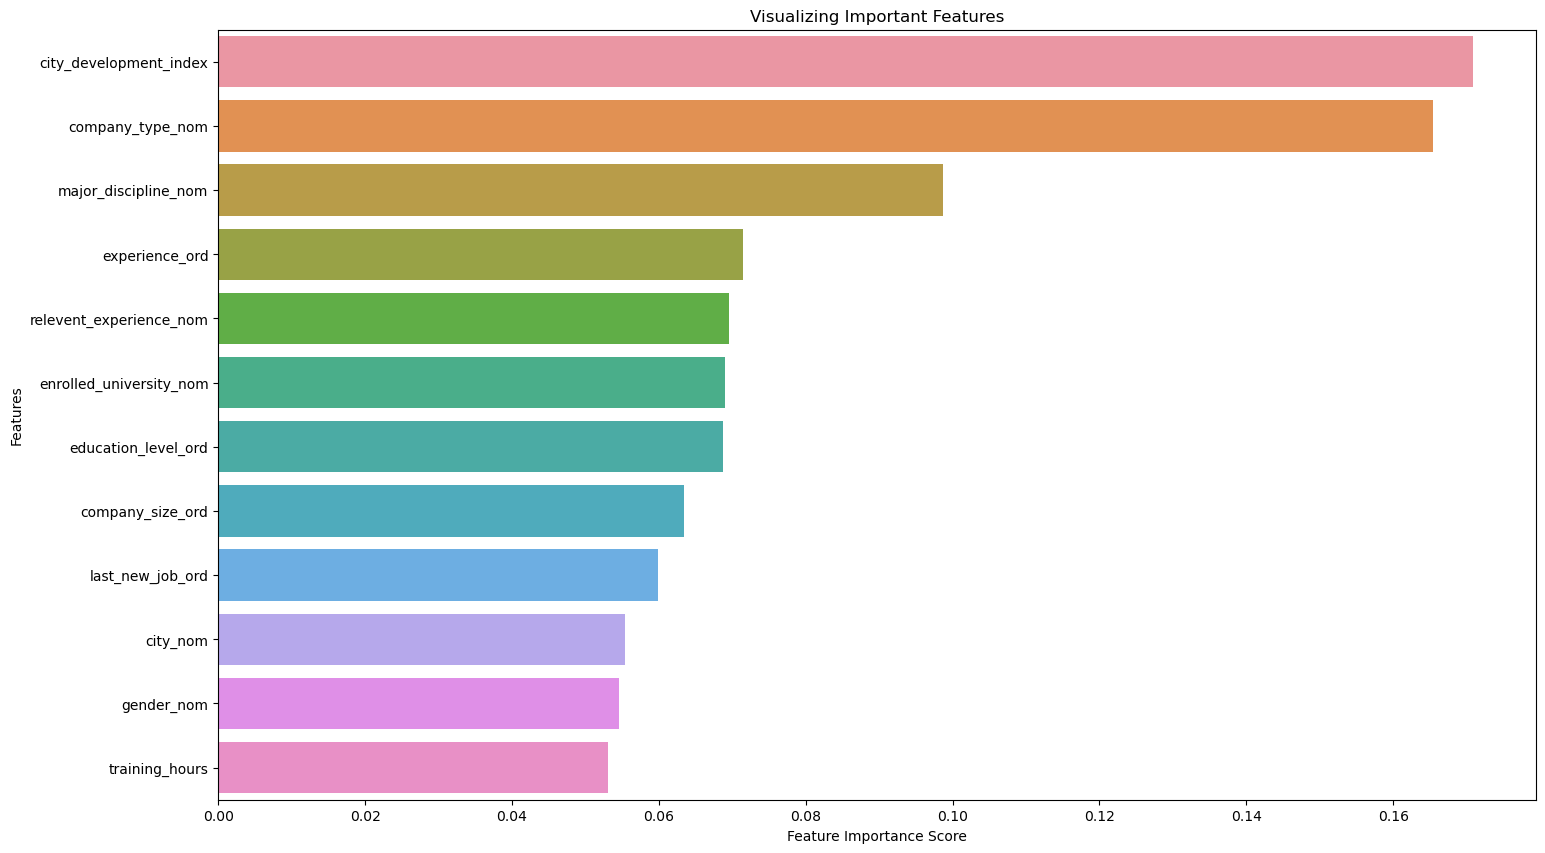

XgBoost test Accuracy: 0.759133611691023
XgBoost test F1 Score
:               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2916
         1.0       0.50      0.44      0.47       916

    accuracy                           0.76      3832
   macro avg       0.66      0.65      0.66      3832
weighted avg       0.75      0.76      0.75      3832



In [35]:
xGboost_flow(data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test)

In [36]:
logreg_flow(data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test)

accuracy mean value: 0.7690202405222613
accuracy STD value: 0.00539181156442713
accuracy mean value: 0.7690855146736973
accuracy STD value: 0.005417912491056484
accuracy mean value: 0.7687592716545828
accuracy STD value: 0.005616428044054711
accuracy mean value: 0.7689549663708253
accuracy STD value: 0.005340910391628132
accuracy mean value: 0.7688897347987445
accuracy STD value: 0.005358848884014632
accuracy mean value: 0.7690202831016165
accuracy STD value: 0.005452813369897665
accuracy mean value: 0.7690202405222613
accuracy STD value: 0.00539181156442713
accuracy mean value: 0.7690202405222613
accuracy STD value: 0.00539181156442713
accuracy mean value: 0.7689549663708253
accuracy STD value: 0.005340910391628132
LogisticRegression test Accuracy: 0.7677453027139874
LogisticRegression test F1 Score
:               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      2916
         1.0       0.53      0.29      0.37       916

    accuracy          

In [37]:
knn_flow(data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test)

accuracy mean value: 0.7384825824889847
accuracy STD value: 0.007011681352415299
accuracy mean value: 0.7558395456612488
accuracy STD value: 0.0029306831217790863
accuracy mean value: 0.752446396849809
accuracy STD value: 0.00724017251755475
accuracy mean value: 0.7584500007664283
accuracy STD value: 0.005283755488580605
accuracy mean value: 0.7603412905632226
accuracy STD value: 0.006422590846721366
accuracy mean value: 0.7616464329571022
accuracy STD value: 0.00615824438304186
Knn test Accuracy: 0.7638308977035491
Knn test F1 Score
:               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      2916
         1.0       0.51      0.27      0.35       916

    accuracy                           0.76      3832
   macro avg       0.66      0.59      0.60      3832
weighted avg       0.73      0.76      0.73      3832



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.791588445
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7841674091
bestIteration = 7

Training on fold [2/5]

bestTest = 0.7853006622
bestIteration = 7

Training on fold [3/5]

bestTest = 0.7832437796
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7785397165
bestIteration = 6

f1-score mean value: 0.768822662320123
f1-score STD value: 0    0.003929
1    0.002765
2    0.002925
3    0.001702
4    0.002875
5    0.000543
6    0.001957
7    0.003415
8    0.003244
9    0.003412
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7927527799
bestIteration = 6

Training on fold [1/5]

bestTest = 0.7854806867
bestIteration = 7

Training on fold [2/5]

bestTest = 0.7842886889
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7812924427
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7801990408
bestIteration = 8

f1-score mean value: 0.768863358981078
f1-score STD value: 0    0.003929
1    0.002780
2    0.003822
3    0.002469
4    0.002026
5    0.002755
6    0.003530
7    0.003269
8    0.002772
9    0.002336
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7890222924
bestIteration = 6

Training on fold [1/5]

bestTest = 0.7919665016
bestIteration = 4

Training on fold [2/5]

bestTest = 0.7813371567
bestIteration = 6

Training on fold [3/5]

bestTest = 0.7744596772
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7761095943
bestIteration = 8

f1-score mean value: 0.7717019031074946
f1-score STD value: 0    0.003929
1    0.004104
2    0.002140
3    0.003228
4    0.005893
5    0.003654
6    0.003110
7    0.003025
8    0.003501
9    0.002897
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7920394701
bestIteration = 7

Training on fold [1/5]

bestTest = 0.7825123783
bestIteration = 3

Training on fold [2/5]

bestTest = 0.7843498302
bestIteration = 8

Training on fold [3/5]

bestTest = 0.7718290698
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7730119235
bestIteration = 9

f1-score mean value: 0.7745384619796655
f1-score STD value: 0    0.003929
1    0.002472
2    0.002180
3    0.003744
4    0.002198
5    0.003026
6    0.003709
7    0.002938
8    0.002173
9    0.001392
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7938310126
bestIteration = 8

Training on fold [1/5]

bestTest = 0.7842524763
bestIteration = 8

Training on fold [2/5]

bestTest = 0.7802679471
bestIteration = 8

Training on fold [3/5]

bestTest = 0.774716478
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7759851265
bestIteration = 6

f1-score mean value: 0.7741213781353811
f1-score STD value: 0    0.003929
1    0.001978
2    0.002498
3    0.003141
4    0.002467
5    0.001663
6    0.001577
7    0.001902
8    0.001883
9    0.002725
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7924379879
bestIteration = 6

Training on fold [1/5]

bestTest = 0.7838537965
bestIteration = 8

Training on fold [2/5]

bestTest = 0.7804035667
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7703268752
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7715999412
bestIteration = 9

f1-score mean value: 0.7732549975604345
f1-score STD value: 0    0.003929
1    0.001833
2    0.001574
3    0.002614
4    0.003844
5    0.002131
6    0.001897
7    0.001945
8    0.002466
9    0.002518
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7911489061
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7847530692
bestIteration = 6

Training on fold [2/5]

bestTest = 0.7799851305
bestIteration = 7

Training on fold [3/5]

bestTest = 0.7623022169
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7683378328
bestIteration = 9

f1-score mean value: 0.7717769759518631
f1-score STD value: 0    0.003929
1    0.002528
2    0.002873
3    0.002216
4    0.001847
5    0.000474
6    0.002366
7    0.003116
8    0.002765
9    0.002851
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7853584636
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7825632358
bestIteration = 8

Training on fold [2/5]

bestTest = 0.7765734576
bestIteration = 8

Training on fold [3/5]

bestTest = 0.7572311139
bestIteration = 5

Training on fold [4/5]

bestTest = 0.766564835
bestIteration = 8

f1-score mean value: 0.7698698590606228
f1-score STD value: 0    0.003929
1    0.001500
2    0.001582
3    0.001727
4    0.001768
5    0.002029
6    0.001931
7    0.002364
8    0.002729
9    0.003058
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7828687352
bestIteration = 0

Training on fold [1/5]

bestTest = 0.7816156738
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7764142164
bestIteration = 8

Training on fold [3/5]

bestTest = 0.7562937303
bestIteration = 5

Training on fold [4/5]

bestTest = 0.764275182
bestIteration = 9

f1-score mean value: 0.768903090683859
f1-score STD value: 0    0.003929
1    0.002778
2    0.003217
3    0.003311
4    0.002351
5    0.002313
6    0.002117
7    0.002327
8    0.002442
9    0.002430
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7828687352
bestIteration = 0

Training on fold [1/5]

bestTest = 0.7787423513
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7775139944
bestIteration = 2

Training on fold [3/5]

bestTest = 0.7553218054
bestIteration = 3

Training on fold [4/5]

bestTest = 0.7631071428
bestIteration = 9

f1-score mean value: 0.7680336994607295
f1-score STD value: 0    0.003929
1    0.002255
2    0.005677
3    0.002866
4    0.001744
5    0.001614
6    0.001749
7    0.001718
8    0.002081
9    0.001437
Name: train-TotalF1-std, dtype: float64
0:	learn: 0.5768136	total: 5.91ms	remaining: 53.2ms
1:	learn: 0.5221920	total: 10.6ms	remaining: 42.3ms
2:	learn: 0.4909508	total: 16.2ms	remaining: 37.7ms
3:	learn: 0.4717413	total: 21ms	remaining: 31.5ms
4:	learn: 0.4598406	total: 25.7ms	remaining: 25.7ms
5:	learn: 0.4538639	total: 32ms	remaining: 21.3ms
6:	learn: 0.4487056	total: 37.4ms	remaining: 16ms
7:	learn: 0.4461395	total: 42.4ms	remaining: 10.6ms
8:	learn: 0.442

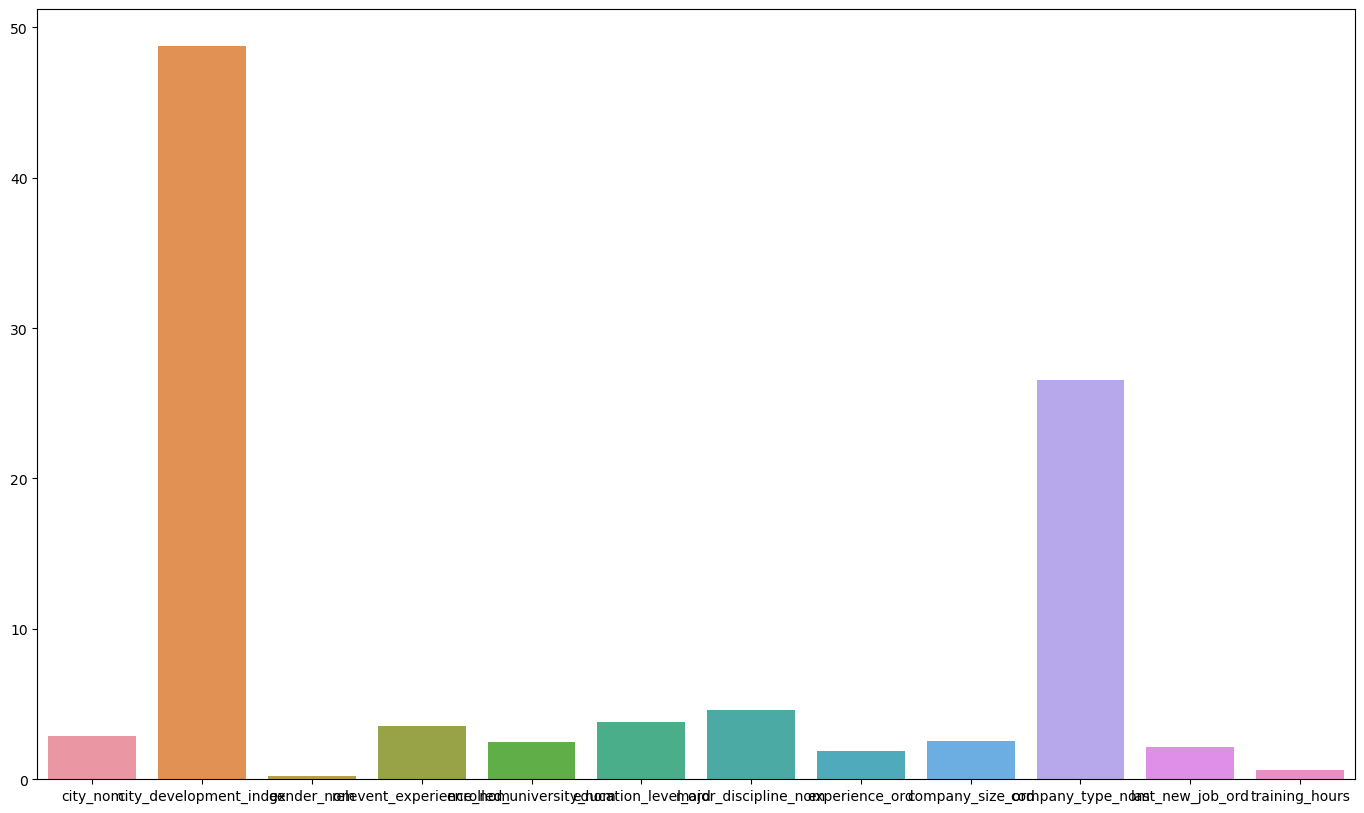

In [38]:
catboost_flow(data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test)